# 2.5: Radar Regocnition

# Import Libraries and Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf

# Keras imports (via TensorFlow)
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [12]:
# Download the weather images and put them in a directory
path = '/Users/ariedlin/Desktop/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [14]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [16]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [34]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9253 - loss: 0.0346 - val_accuracy: 0.8080 - val_loss: 0.0712
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 23s 855ms/step - accuracy: 0.8438 - loss: 0.0629

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8438 - loss: 0.0629 - val_accuracy: 0.7812 - val_loss: 0.0837
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8997 - loss: 0.0376 - val_accuracy: 0.8393 - val_loss: 0.0582
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9688 - loss: 0.0128 - val_accuracy: 0.8259 - val_loss: 0.0562
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9245 - loss: 0.0280 - val_accuracy: 0.8661 - val_loss: 0.0522
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9375 - loss: 0.0228 - val_accuracy: 0.8705 - val_loss: 0.0489
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9596 - loss: 0.0164 - val_accuracy: 0.8750 - val_loss: 0.0498
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8750 - loss: 0.0344 - val_accuracy: 0.8705 - val_loss: 0.0480
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9347 - loss: 0.0246 - val_accuracy: 0.7723 - val_loss: 0.10

In [36]:
results = pd.DataFrame(model.history.history)

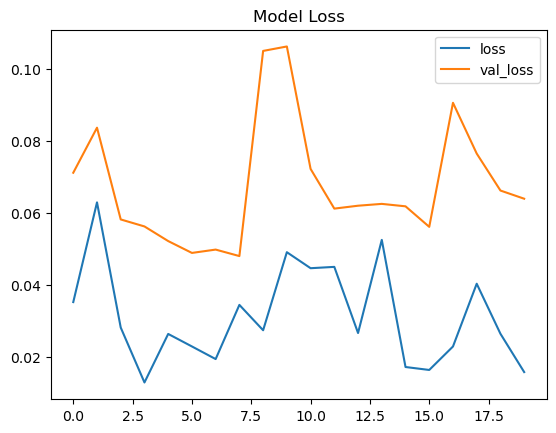

In [38]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

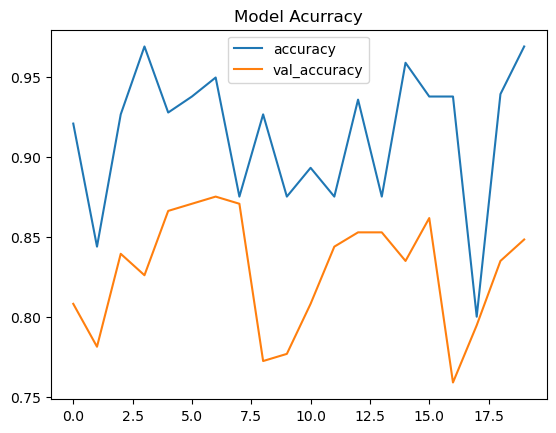

In [40]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [42]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 0.8482142686843872
Loss: 0.015718020498752594, Val_Loss: 0.06395544111728668


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step


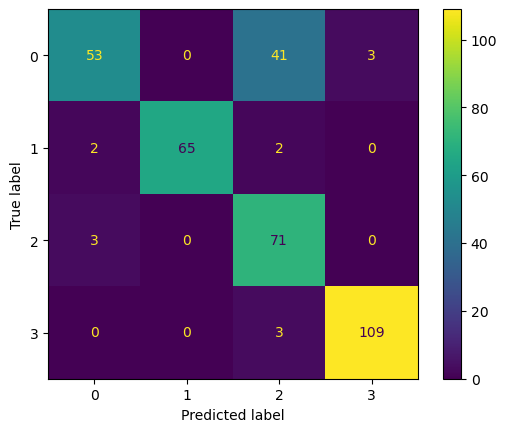

In [44]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


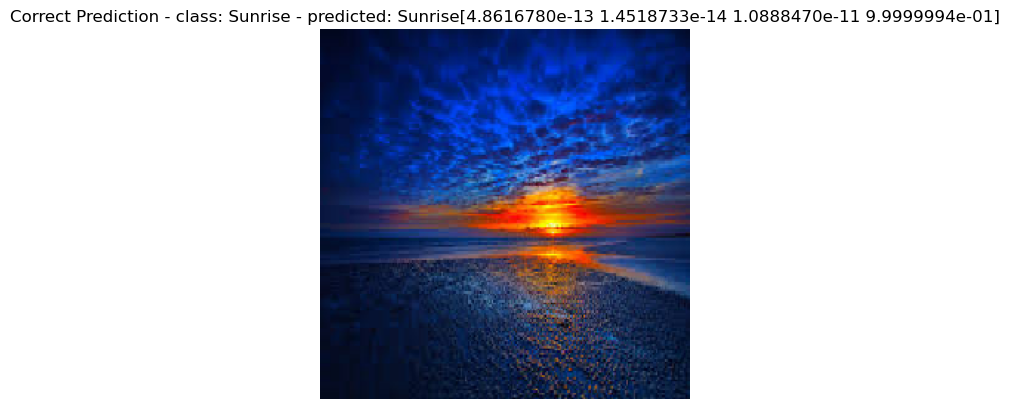

In [50]:
predict_one(model, 1) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


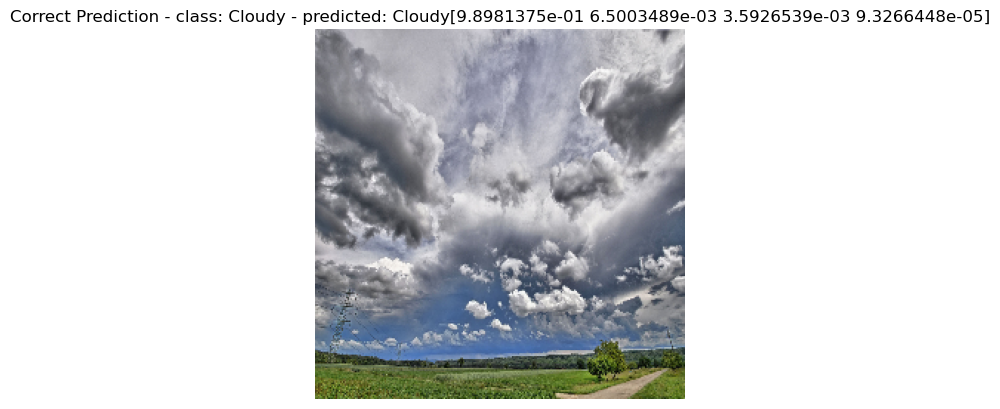

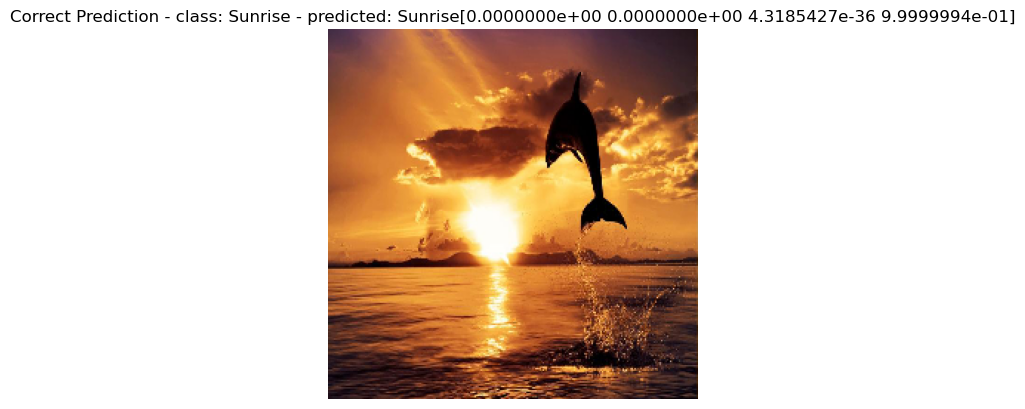

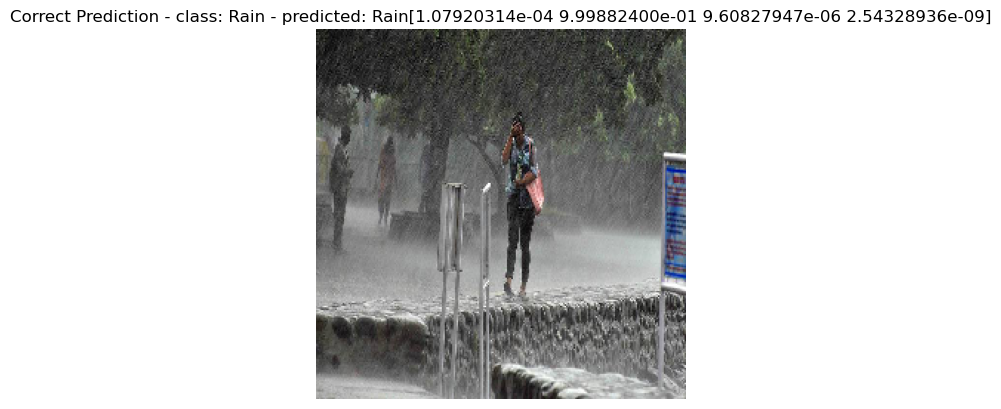

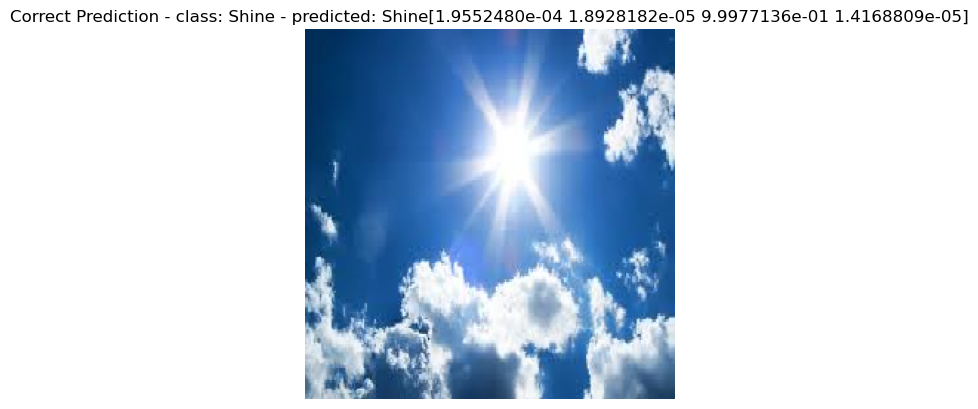

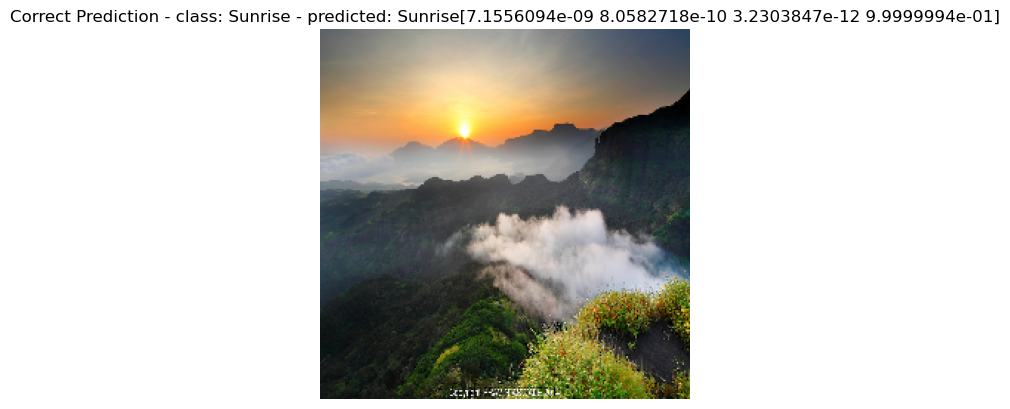

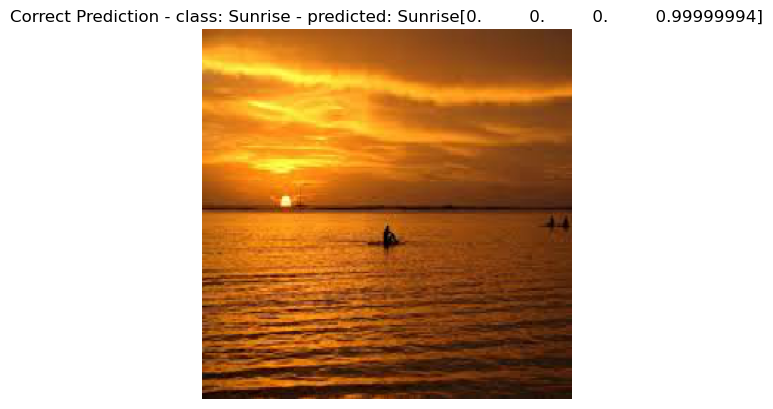

In [52]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


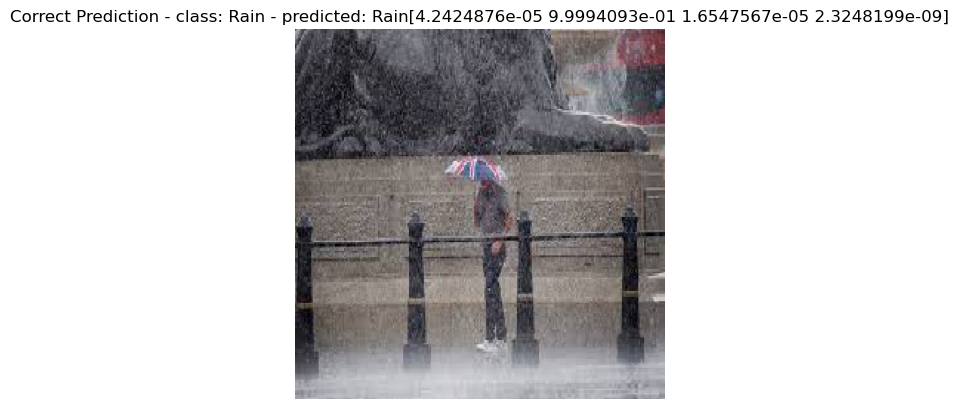

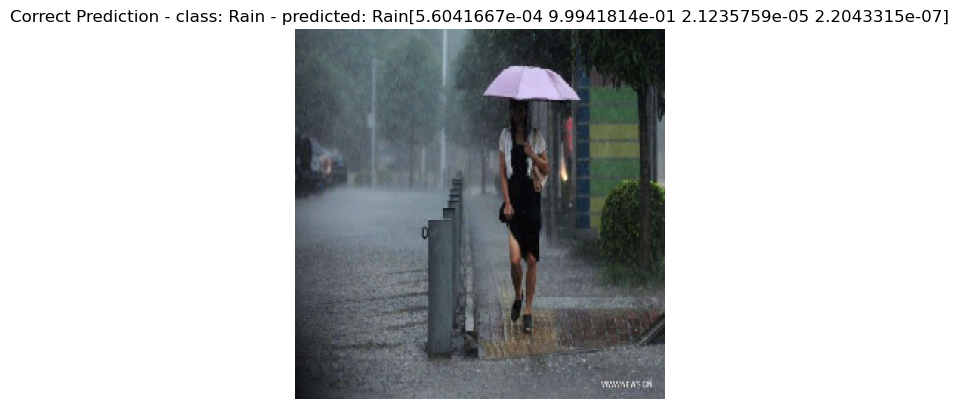

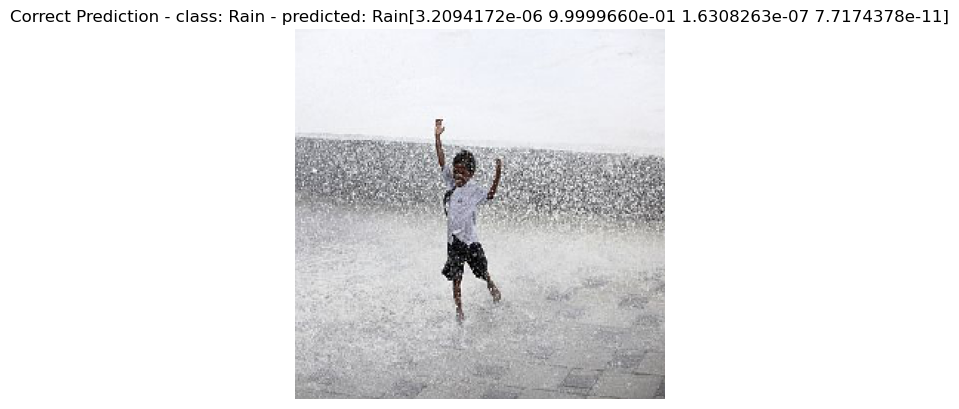

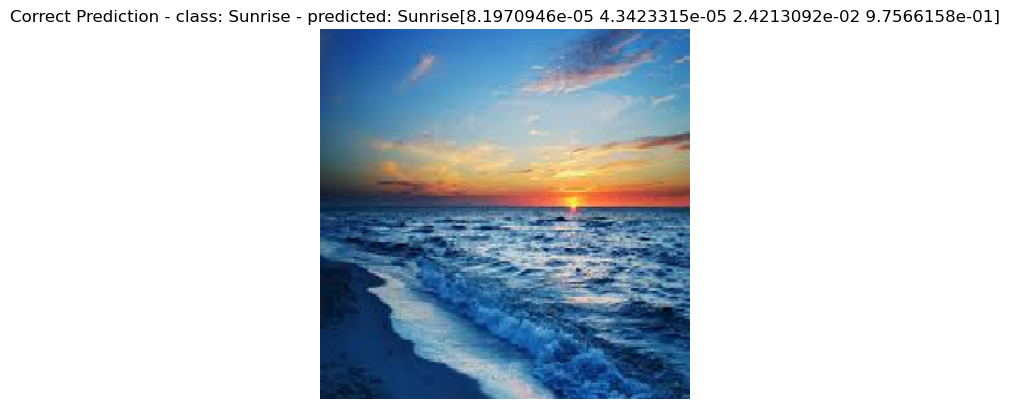

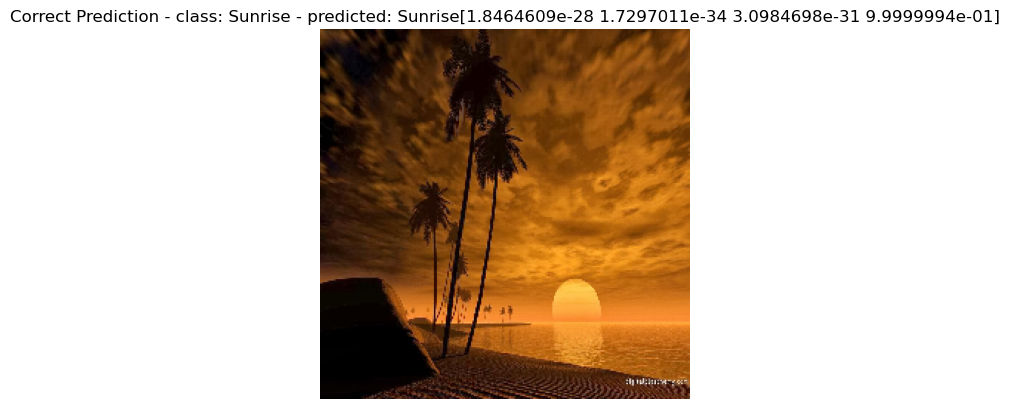

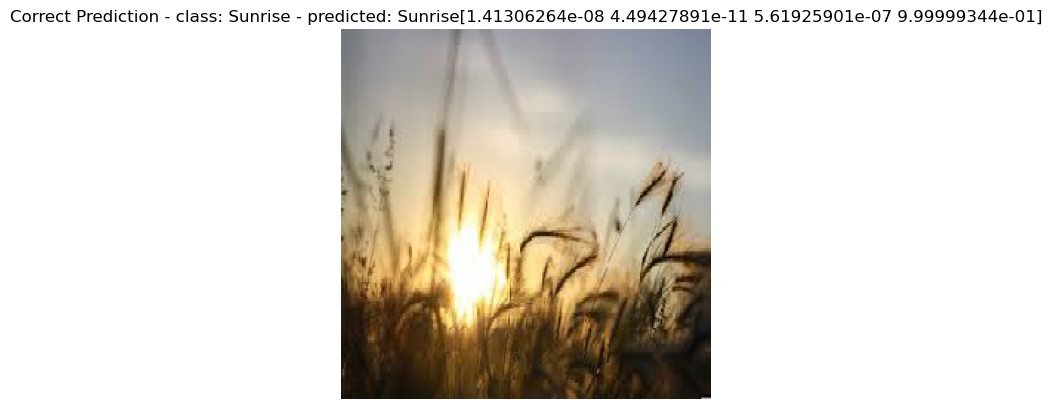

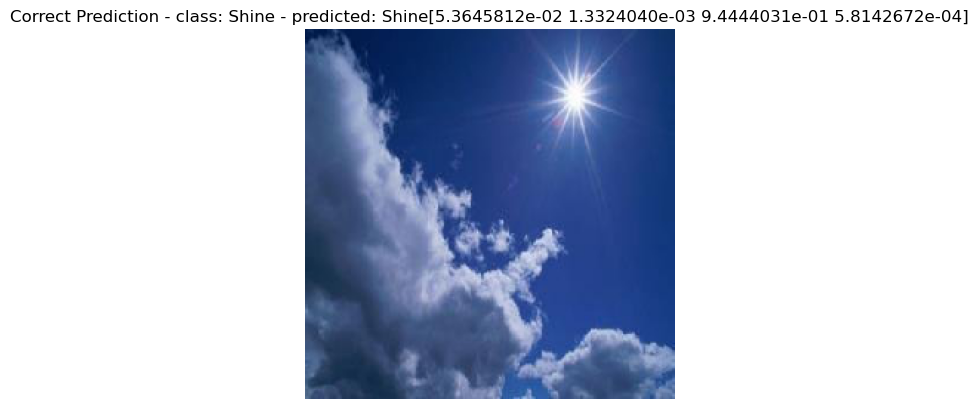

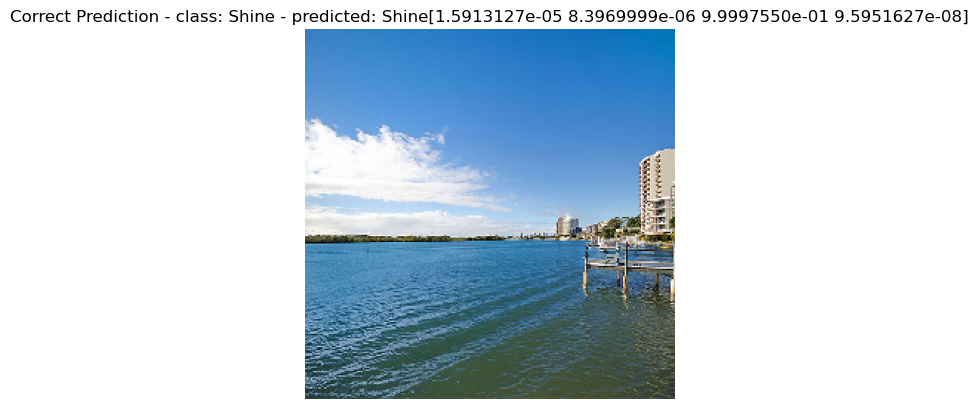

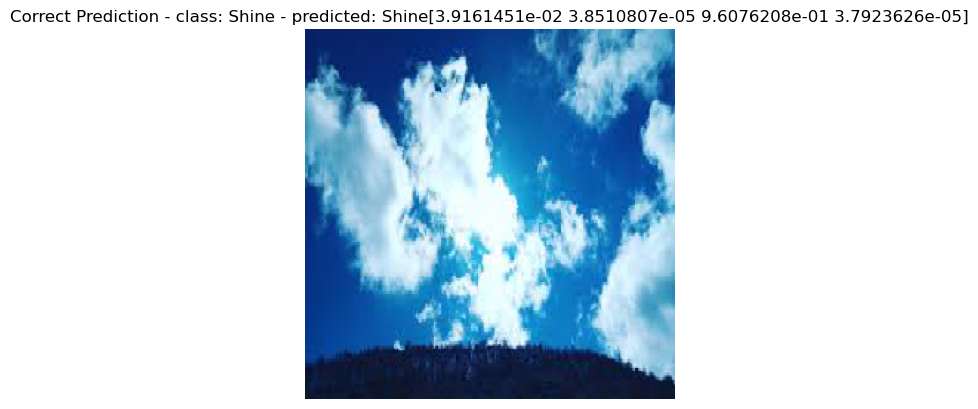

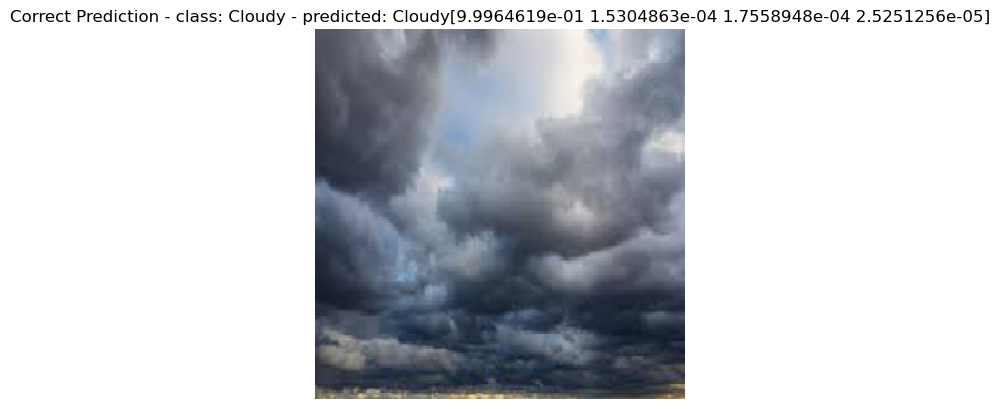

In [54]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.